# DSC540 Project 1

DePaul University  
Ilyas Ustun, PhD  
Chicago, IL  

In [230]:
import sklearn
sklearn.__version__

'1.0.2'

In [231]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [232]:
pd.set_option('display.max_columns', 100)

### These are the packages I used

In [233]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing

# DSC540 Project 1

## Rules
- Do not change the code already present in the notebook.
- Write your code under the corresponding questions where you see `# Code here`. You can use more than one cell, if you'd like.
- Provide explanation in a separate Markdown formatted cell. 
- You can change the cell type by:
    - Clicking on the outer area of the cell type you want to change,
    - Go to the top, and select either Code or Markdown from the dropdown menu.
- Be concise in your explanations and conclusions.
- Write clear code and provide explanation to functions you create by using `#` comment sign.
- For built-in function and methods you use from libraries, provide a very brief explanation of what they do.
- Try to answer the questions by yourself. Use documentation from pandas, sklearn and similar libraries to solve the problem.
- If you are stuck you can use different resources. Do not find an identical project and copy paste the solutions. 
- Write your name before beginning to code.


Important:  
- **Do NOT share the solutions with other people.**
- **Do NOT share the solutions on the internet including but not limited to Github and other platforms.**
- Sign the Honor Pledge below indicating that you have agreed to these rules listed here, and any other ethical and honor rules as required by the university.



- **Deliverables:**
    1. The Python Jupyter notebook file named properly with your name. Example: dsc540_project1_john_doe.ipynb
    2. The HTML output of this code notebook names the same way. Example: dsc540_project1_john_doe.html
        - File -> Download as -> HTML   
       

Good Luck!

### Saransh Thakur

**Honor Pledge:**  
I pledge on my honor that I, **Saransh Thakur**, have followed the rules listed above, that I have not given or received any unauthorized assistance on this assignment. 


## The Data

In this project, we will be working with the **Breast Cancer Wisconsin dataset**, which
contains 569 examples of malignant and benign tumor cells.  
The Breast Cancer Wisconsin dataset can be found in the UCI
Machine Learning Repository, and more detailed information about this dataset can
be found at https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic).  
The first two columns in the dataset store the unique ID numbers of the examples and the corresponding
diagnoses (M = malignant, B = benign), respectively.   
Columns 3-32 contain 30 real-valued features that have been computed from digitized images of the cell
nuclei, which can be used to build a model to predict whether a tumor is benign
or malignant.  

**Variable Information:**

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)
    
    
The mean, standard error, and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.  For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

### Load the dataset

- Since the dataset at the UCI repository does not have headers, we will read the data from the hard drive which I have modified.
- Last column is the target column.
- The ID column is already dropped.

In [234]:
df = pd.read_csv('wdbc.data', header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [235]:
df.columns = ['id', 'diagnosis', 'mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension']

In [236]:
df.head()

,id,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [237]:
X = df.drop(['id', 'diagnosis'], axis=1)

In [238]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


The target vector is `y`.

In [239]:
y = df.diagnosis
y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

### Question 1 [10 points]
How many people have cancer?

> Hint: Should be less than 300!

In [240]:
people_cancer = df['diagnosis']=='M'
print(people_cancer.info())
print(people_cancer.sum())


<class 'pandas.core.series.Series'>
RangeIndex: 569 entries, 0 to 568
Series name: diagnosis
Non-Null Count  Dtype
--------------  -----
569 non-null    bool 
dtypes: bool(1)
memory usage: 697.0 bytes
None
212


212 people have malignant cancer.


Check the feature set `X` and investigate the column types. Is there any categorical data? Any missing values? 
How many observations? How many variables are there in the feature set (`X`)?

In [241]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

- No missing values. 
- No categorical variables. 
- 569 observations, 30 columns.

### Question 2 [5 points]
- Check the statistical summary of numeric features. Do the variables have values close to each other, or is there large differences?
- Among the `mean` (the first 10) features, which one has the minimum 25% percentile value? 
- Which `mean` variable (the first 10 features) has the largest mean value?

In [242]:
X.describe().round(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00
mean,14.13,19.29,91.97,654.89,0.10,0.10,0.09,0.05,0.18,0.06,0.41,1.22,2.87,40.34,0.01,0.03,0.03,0.01,0.02,0.00,16.27,25.68,107.26,880.58,0.13,0.25,0.27,0.11,0.29,0.08
std,3.52,4.30,24.30,351.91,0.01,0.05,0.08,0.04,0.03,0.01,0.28,0.55,2.02,45.49,0.00,0.02,0.03,0.01,0.01,0.00,4.83,6.15,33.60,569.36,0.02,0.16,0.21,0.07,0.06,0.02
min,6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,0.11,0.05,0.11,0.36,0.76,6.80,0.00,0.00,0.00,0.00,0.01,0.00,7.93,12.02,50.41,185.20,0.07,0.03,0.00,0.00,0.16,0.06
25%,11.70,16.17,75.17,420.30,0.09,0.06,0.03,0.02,0.16,0.06,0.23,0.83,1.61,17.85,0.01,0.01,0.02,0.01,0.02,0.00,13.01,21.08,84.11,515.30,0.12,0.15,0.11,0.06,0.25,0.07
50%,13.37,18.84,86.24,551.10,0.10,0.09,0.06,0.03,0.18,0.06,0.32,1.11,2.29,24.53,0.01,0.02,0.03,0.01,0.02,0.00,14.97,25.41,97.66,686.50,0.13,0.21,0.23,0.10,0.28,0.08
75%,15.78,21.80,104.10,782.70,0.11,0.13,0.13,0.07,0.20,0.07,0.48,1.47,3.36,45.19,0.01,0.03,0.04,0.01,0.02,0.00,18.79,29.72,125.40,1084.00,0.15,0.34,0.38,0.16,0.32,0.09
max,28.11,39.28,188.50,2501.00,0.16,0.35,0.43,0.20,0.30,0.10,2.87,4.88,21.98,542.20,0.03,0.14,0.40,0.05,0.08,0.03,36.04,49.54,251.20,4254.00,0.22,1.06,1.25,0.29,0.66,0.21


- There are large differences between the variables.
- `mean area` has the largest mean value
- `mean concave points` has the minimum 25% percentile value.

### Question 3 [5 points]
These features are all engineered from images. I suspect there is some variables with large correlation. Are there largely correlated variables? Why do you think they are largely correlated? Comment on a few.
- Calculate correlation.
- Create a correlation heatmap.
- Comment on largely correlated variables.

In [243]:
correlation = X.corr().round(2)
correlation

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.00,0.32,1.00,0.99,0.17,0.51,0.68,0.82,0.15,-0.31,0.68,-0.10,0.67,0.74,-0.22,0.21,0.19,0.38,-0.10,-0.04,0.97,0.30,0.97,0.94,0.12,0.41,0.53,0.74,0.16,0.01
mean texture,0.32,1.00,0.33,0.32,-0.02,0.24,0.30,0.29,0.07,-0.08,0.28,0.39,0.28,0.26,0.01,0.19,0.14,0.16,0.01,0.05,0.35,0.91,0.36,0.34,0.08,0.28,0.30,0.30,0.11,0.12
mean perimeter,1.00,0.33,1.00,0.99,0.21,0.56,0.72,0.85,0.18,-0.26,0.69,-0.09,0.69,0.74,-0.20,0.25,0.23,0.41,-0.08,-0.01,0.97,0.30,0.97,0.94,0.15,0.46,0.56,0.77,0.19,0.05
mean area,0.99,0.32,0.99,1.00,0.18,0.50,0.69,0.82,0.15,-0.28,0.73,-0.07,0.73,0.80,-0.17,0.21,0.21,0.37,-0.07,-0.02,0.96,0.29,0.96,0.96,0.12,0.39,0.51,0.72,0.14,0.00
mean smoothness,0.17,-0.02,0.21,0.18,1.00,0.66,0.52,0.55,0.56,0.58,0.30,0.07,0.30,0.25,0.33,0.32,0.25,0.38,0.20,0.28,0.21,0.04,0.24,0.21,0.81,0.47,0.43,0.50,0.39,0.50
mean compactness,0.51,0.24,0.56,0.50,0.66,1.00,0.88,0.83,0.60,0.57,0.50,0.05,0.55,0.46,0.14,0.74,0.57,0.64,0.23,0.51,0.54,0.25,0.59,0.51,0.57,0.87,0.82,0.82,0.51,0.69
mean concavity,0.68,0.30,0.72,0.69,0.52,0.88,1.00,0.92,0.50,0.34,0.63,0.08,0.66,0.62,0.10,0.67,0.69,0.68,0.18,0.45,0.69,0.30,0.73,0.68,0.45,0.75,0.88,0.86,0.41,0.51
mean concave points,0.82,0.29,0.85,0.82,0.55,0.83,0.92,1.00,0.46,0.17,0.70,0.02,0.71,0.69,0.03,0.49,0.44,0.62,0.10,0.26,0.83,0.29,0.86,0.81,0.45,0.67,0.75,0.91,0.38,0.37
mean symmetry,0.15,0.07,0.18,0.15,0.56,0.60,0.50,0.46,1.00,0.48,0.30,0.13,0.31,0.22,0.19,0.42,0.34,0.39,0.45,0.33,0.19,0.09,0.22,0.18,0.43,0.47,0.43,0.43,0.70,0.44
mean fractal dimension,-0.31,-0.08,-0.26,-0.28,0.58,0.57,0.34,0.17,0.48,1.00,0.00,0.16,0.04,-0.09,0.40,0.56,0.45,0.34,0.35,0.69,-0.25,-0.05,-0.21,-0.23,0.50,0.46,0.35,0.18,0.33,0.77


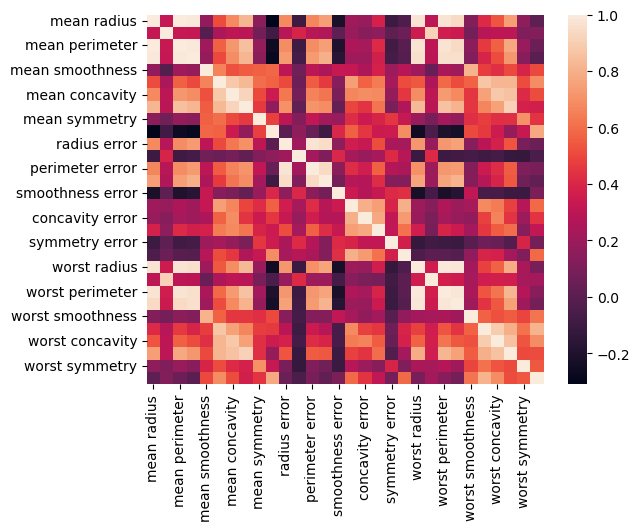

In [244]:
heatmap =sns.heatmap(correlation)

The mean radius and mean perimeter are highly correlated and mean raduis and mean area are correleated too. From this we can say that as the value of mean raduis increascres, mean parameter also increases. 

### Train - Test split 
- Use sklearn's `tran_test_split()` function to create the split.
- Use `random_state = 55` to create consistent and repeatable train-test splits.

- What is the proportion of cancer classes in train and test sets after splitting? Are they equal or very close to each other?
- What is the importance of stratified sampling?

In [245]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()

In [246]:
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [247]:
y = lb.fit_transform(y).ravel()

In [248]:
y = pd.Series(y)

In [249]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Length: 569, dtype: int64

In [250]:
# split the datasets into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 55, test_size= 0.25)

In [251]:
y_train.value_counts(normalize=True)

0    0.626761
1    0.373239
dtype: float64

In [252]:
y_test.value_counts(normalize=True)

0    0.629371
1    0.370629
dtype: float64

Stratified random sampling ensures that the splits keep their proportion of targets values. This is important to stay consistent with the data collected.

Now let's train a logistic regression model on the breast cancer data. This is a binary classification problem.

### Question 4 [10 points]

- Initiate the logistic regression classifier from the sklearn library as shown below.
- Fit the model
- Make predictions
- Calculate accuracy score. What are the **training** and **testing** accuracies of the model?
- Create confusion matrix
- Either calculate using the confusion matrix, or use the methods in `metrics` to get the following metrics on the testing set:
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - False Positive Rate
     - F1 Score

In [253]:
from sklearn.linear_model import LogisticRegression

In [254]:
clf = LogisticRegression(max_iter = 10000, C=0.1)

In [255]:
print(clf.fit(X_train,y_train))

LogisticRegression(C=0.1, max_iter=10000)


# Training Accuracy

In [272]:
predict=clf.predict(X_train)
print(predict)

print("Training accuracy",metrics.accuracy_score(y_train,predict)*100)

[0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1
 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0
 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0
 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0
 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0
 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 1]
Training accuracy 90.84507042253522


/Users/cdmstudent/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# Testing accuracy

In [273]:
predict = clf.predict(X_test)
print(predict)
print("Testing accuracy is ", metrics.accuracy_score(y_test,predict)*100)


[0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0]
Testing accuracy is  93.00699300699301


/Users/cdmstudent/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# Confusion matrix

In [274]:
sklearn.metrics.confusion_matrix(y_test, predict,labels=None, sample_weight=None, normalize=None)

array([[88,  2],
       [ 8, 45]])

In [275]:
print(metrics.classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        90
           1       0.96      0.85      0.90        53

    accuracy                           0.93       143
   macro avg       0.94      0.91      0.92       143
weighted avg       0.93      0.93      0.93       143



### Question 5 [10 points]

- Initiate the k-nearest neighbours classifier from the sklearn library with n_neighbors=1. Keep the remaining parameters with their default values. (No need to specify anything)
- Fit the model
- Make predictions
- Calculate accuracy score. What are the **training** and **testing** accuracies of the model?
- Create confusion matrix
- Either calculate using the confusion matrix, or using the methods in `metrics` to get the following metrics on the testing set:
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - F1 Score

In [276]:
from sklearn.neighbors import KNeighborsClassifier

In [277]:
clf = KNeighborsClassifier(n_neighbors=1)

In [278]:
print(clf.fit(X_train,y_train))

KNeighborsClassifier(n_neighbors=1)


# Training accuracies

In [279]:

predict =clf.predict(X_train)
print(predict)
print("Training accuracy",metrics.accuracy_score(y_train,predict)*100)


[1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1
 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0
 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0
 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0
 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 0 0 1
 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0
 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0
 1 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0
 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0
 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 0 1]
Training accuracy 100.0


/Users/cdmstudent/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# Testing Accuracy

In [280]:
predict = clf.predict(X_test)
print(predict)
print('The testing accuracy is ',metrics.accuracy_score(y_test, predict)*100)

[0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1
 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1
 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0 1 1]
The testing accuracy is  94.4055944055944


/Users/cdmstudent/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [281]:
sklearn.metrics.confusion_matrix(y_test, predict,labels=None, sample_weight=None, normalize=None)

array([[86,  4],
       [ 4, 49]])

In [282]:
print(metrics.classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        90
           1       0.92      0.92      0.92        53

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



### Question 6 [10 points]

In logistic regression keeping the other parameters constant try these values for C: `C_list = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 10, 50, 100, 200, 500, 1000, 2000, 5000, 10000]`.  
C is the inverse of the regularization parameter $\lambda$. As C increases, the penalty decreases.
- Create a loop and fit the models using each C value. 
- Make predictions
- Calculate accuracy scores for **training** and **testing** datasets. Create a list of accuracy results for train and test accuracies. Show these lists.
- Create the validation curve based on each C value and the corresponding train and test accuracies. 
> Create this curve yourself. Do not use sklearn built-in function.

In [283]:
train_acc=[]
test_acc=[]
C_list = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 10, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
for i in C_list:
    clf = LogisticRegression(max_iter = 10000,C =i)
    clf.fit(X_train,y_train)
    predict_train = clf.predict(X_train)
    predict_test = clf.predict(X_test)
    train_acc.append(metrics.accuracy_score(y_train,predict_train)*100)
    test_acc.append(metrics.accuracy_score(y_test,predict_test)*100)
print("Training Accuracy are",train_acc)
print("************************************")
print("Testing Accuracy are",test_acc)

Training Accuracy are [92.48826291079813, 93.1924882629108, 94.13145539906104, 93.42723004694837, 93.89671361502347, 94.13145539906104, 94.13145539906104, 94.60093896713614, 94.60093896713614, 95.07042253521126, 96.24413145539906, 97.1830985915493, 97.88732394366197, 98.12206572769952, 98.82629107981221, 99.06103286384976, 98.82629107981221, 98.82629107981221, 98.82629107981221]
************************************
Testing Accuracy are [93.7062937062937, 95.8041958041958, 97.9020979020979, 97.2027972027972, 97.2027972027972, 97.9020979020979, 98.6013986013986, 99.3006993006993, 99.3006993006993, 98.6013986013986, 99.3006993006993, 99.3006993006993, 99.3006993006993, 99.3006993006993, 98.6013986013986, 97.9020979020979, 97.2027972027972, 97.2027972027972, 97.9020979020979]


Text(0.5, 1.0, 'Validation curve')

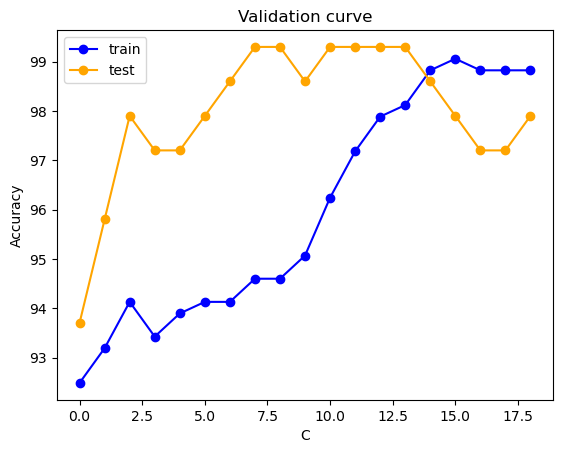

In [285]:
fig =plt.figure
plt.plot(train_acc,marker='o', color='blue', label = 'train')
plt.plot(test_acc,marker='o', color='orange', label = 'test')
plt.legend()
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Validation curve")

### Question 7 [10 points]

In K Nearest Neighbors keeping the other parameters constant try these values for K (n_neighbors): `K_list = [1,3,5,7,9,15,19,25,29,35,39,45,49]`.  
- Create a loop and fit the models using each K value. 
- Make predictions
- Calculate accuracy scores for **training** and **testing** datasets. Create a list of accuracy results for train and test accuracies. Show these lists.
- Create the validation curve based on each K value and the corresponding train and test accuracies. 
> Create this curve yourself. Do not use sklearn built-in function.

In [286]:
train_acc=[]
test_acc=[]
k_list = [1,3,5,7,9,15,19,25,29,35,39,45,49]
for i in k_list:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train,y_train)
    predict_train = clf.predict(X_train)
    predict_test = clf.predict(X_test)
    train_acc.append(metrics.accuracy_score(y_train,predict_train)*100)
    test_acc.append(metrics.accuracy_score(y_test,predict_test)*100)
print("Training Accuracy are",train_acc)
print("************************************")
print("Testing Accuracy are",test_acc)

/Users/cdmstudent/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/cdmstudent/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

Training Accuracy are [100.0, 94.83568075117371, 94.60093896713614, 93.89671361502347, 93.1924882629108, 92.48826291079813, 92.72300469483568, 92.48826291079813, 92.25352112676056, 92.25352112676056, 92.25352112676056, 91.31455399061032, 90.84507042253522]
************************************
Testing Accuracy are [94.4055944055944, 96.5034965034965, 93.7062937062937, 94.4055944055944, 93.7062937062937, 94.4055944055944, 94.4055944055944, 93.7062937062937, 93.7062937062937, 93.7062937062937, 93.00699300699301, 92.3076923076923, 93.00699300699301]


/Users/cdmstudent/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/cdmstudent/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

Text(0.5, 1.0, 'Validation curve')

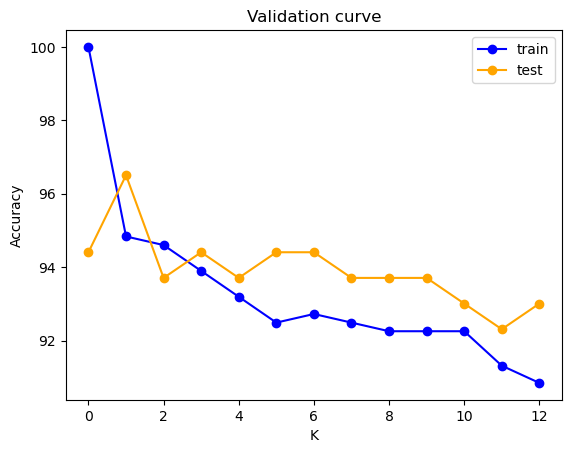

In [287]:
fig =plt.figure
plt.plot(train_acc,marker='o', color='blue', label = 'train')
plt.plot(test_acc,marker='o', color='orange', label = 'test')
plt.legend()
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title("Validation curve")

### Question 8 [10 points]

- The validation curve for logistic regression seems a bit weird. That might have to do with the fact that the data is not normalized.
- Apply standardization to the data.
- In logistic regression keeping the other parameters constant try these values for C: `C_list = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 10, 50, 100, 200, 500, 1000, 2000, 5000, 10000]`.  
- Plot validation curves. What do you see? 
- Which value would you choose for C in logistic regression?

In [303]:
from sklearn import preprocessing

In [307]:
ss = preprocessing.StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [308]:
train_acc=[]
test_acc=[]
C_list = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 10, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
for i in C_list:
    clf = LogisticRegression(max_iter = 10000,C =i)
    clf.fit(X_train_ss,y_train)
    predict_train = clf.predict(X_train_ss)
    predict_test = clf.predict(X_test_ss)
    train_acc.append(metrics.accuracy_score(y_train,predict_train)*100)
    test_acc.append(metrics.accuracy_score(y_test,predict_test)*100)
print("Training Accuracy are",train_acc)
print("************************************")
print("Testing Accuracy are",test_acc)

Training Accuracy are [64.55399061032864, 83.56807511737088, 88.49765258215963, 94.60093896713614, 94.83568075117371, 97.88732394366197, 98.35680751173709, 99.06103286384976, 99.06103286384976, 99.29577464788733, 99.29577464788733, 99.29577464788733, 99.29577464788733, 99.53051643192488, 99.76525821596243, 99.76525821596243, 100.0, 100.0, 100.0]
************************************
Testing Accuracy are [63.63636363636363, 86.7132867132867, 93.00699300699301, 96.5034965034965, 96.5034965034965, 97.9020979020979, 98.6013986013986, 98.6013986013986, 97.9020979020979, 97.9020979020979, 97.9020979020979, 97.2027972027972, 97.2027972027972, 97.2027972027972, 97.2027972027972, 96.5034965034965, 96.5034965034965, 96.5034965034965, 96.5034965034965]


Text(0.5, 1.0, 'Validation curve')

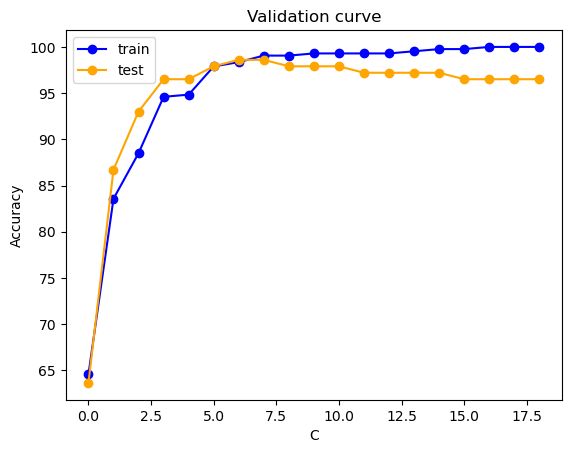

In [309]:
fig =plt.figure
plt.plot(train_acc,marker='o', color='blue', label = 'train')
plt.plot(test_acc,marker='o', color='orange', label = 'test')
plt.legend()
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Validation curve")

The validation curve and the training curve should be similar and we can see from the figure above that they are similar to each other. We will choose the value of the parameter where the training and validation curves are closest to each other. For that we will choose C = 5.

### Question 9 [10 points]

- After choosing your best C value, let's check the learning curve.
- Create a logistic regression model of your chosen C value.
- Starting from 10 data points in the training set, increase your training set size by 1 points in each iteration, fit the model, get the accuracy scores for both the current training and test sets.
- Increase the training set size consecutively. Do not randomly select data points. (`X_train_ss[0:N,:] where N = {1,2,3,...,len(X_train_ss)}`)
- Plot the learning curve. What do you see? Comment on your finding. 

In [310]:
X_train_ss.shape

(426, 30)

In [311]:
# list(range(1, X_train_ss.shape[0]))
n=1
X_train_ss[0:n,:]

array([[-0.50323613,  1.73953408, -0.44053352, -0.49664617,  0.53358854,
         0.59839524,  0.25384105, -0.07259947,  0.47589812,  0.94655516,
         0.01943197,  1.10918571, -0.08331186, -0.11344568,  0.73341644,
         0.68332997,  0.17965816,  0.26900086, -0.2116796 ,  0.6599449 ,
        -0.12918496,  2.17946516, -0.1622508 , -0.19511526,  1.9967161 ,
         1.31027091,  0.79584853,  0.47330699,  0.45100311,  1.90561739]])

In [312]:
y_train

193    1
543    0
255    1
142    0
330    1
      ..
167    1
73     1
366    1
245    0
239    1
Length: 426, dtype: int64

In [313]:
accuracy_train = []
accuracy_test = []
for n in range(10, X_train_ss.shape[0]):
    clf = LogisticRegression(max_iter = 100, solver='lbfgs', penalty='l2', C=0.5, verbose=0)
    clf.fit(X_train_ss[0:n,:], y_train[0:n])
    pred_trn = clf.predict(X_train_ss[0:n,:])
    accuracy_train.append(metrics.accuracy_score(y_true = y_train[0:n], y_pred = pred_trn))
    pred_tst = clf.predict(X_test_ss)
    accuracy_test.append(metrics.accuracy_score(y_true = y_test, y_pred = pred_tst))

Text(0.5, 1.0, 'Learning Curve')

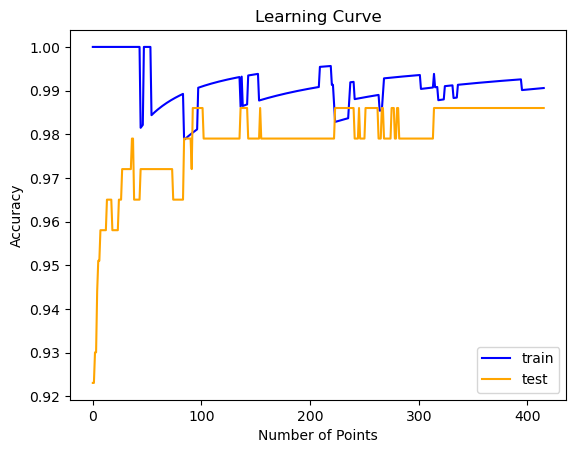

In [316]:

plt.plot(accuracy_train,color='blue', label = 'train')
plt.plot(accuracy_test,color='orange', label = 'test')
plt.legend()
plt.xlabel('Number of Points')
plt.ylabel('Accuracy')
plt.title("Learning Curve")

A learning curve shows the validation and training score of an estimator for varying numbers of training samples. It is a tool to find out how much we benefit from adding more training data.
In above example the training score is much greater than the testing score means that adding more training samples will most likely increase generalization.

### Question 10 [20 points]
- Think of other ways of improving the accuracy and list at least two possibilities.
- Implement both the methods you proposed. 
- Is the model accuracy increasing? Why do you think this might have helped?
- If both of them did not impove, can you think of anything else? (Optional to apply)

When we have computed the correlation , we can see that there is some variable which is highly correlated with each other, so there may be a problem of multicollinearity. To check multicollinarity, I have used VIF. Highly correlated variable will have high VIF score.

So, I have removed the variable which have high VIF score.

In [350]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [333]:

vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [326]:
vif.round()

,VIF Factor,features
0,63306.0,mean radius
1,251.0,mean texture
2,58124.0,mean perimeter
3,1287.0,mean area
4,393.0,mean smoothness
5,201.0,mean compactness
6,158.0,mean concavity
7,154.0,mean concave points
8,184.0,mean symmetry
9,630.0,mean fractal dimension


In [334]:
new_X = df.drop(['id', 'diagnosis','mean perimeter', 'mean radius','worst radius','worst perimeter'], axis=1)

In [339]:
new_X.head()

,mean texture,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst texture,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,10.38,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,17.77,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,21.25,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,20.38,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,26.50,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,14.34,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Using train & test split on the new data

In [351]:
X_train, X_test, y_train, y_test = train_test_split(new_X, y, stratify=y, random_state = 55, test_size= 0.25)

# using logistic regression

In [352]:
clf = LogisticRegression(max_iter = 10000,C =i)
print(clf.fit(X_train,y_train))
predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

LogisticRegression(C=10000, max_iter=10000)


# Training accuracy

In [353]:
predict=clf.predict(X_train)
print(predict)

print("Training accuracy",metrics.accuracy_score(y_train,predict)*100)

[1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1
 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0
 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0
 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0
 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 0 0 1
 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0
 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0
 1 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0
 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1]
Training accuracy 98.82629107981221


# Testing accuracy

In [354]:
predict = clf.predict(X_test)
print(predict)
print("Testing accuracy is ", metrics.accuracy_score(y_test,predict)*100)


[0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1
 1 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 0]
Testing accuracy is  97.9020979020979


In [355]:
sklearn.metrics.confusion_matrix(y_test, predict,labels=None, sample_weight=None, normalize=None)

array([[90,  0],
       [ 3, 50]])

In [356]:
print(metrics.classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        90
           1       1.00      0.94      0.97        53

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143



We can see that our training accuracy and testing accuracy has changed when we uses VIF. Training accuracy has changed from 90 to 99 and testing accuracy has changed from 93 to 98.

# using naive bayes

In [357]:
model = GaussianNB()
print(model.fit(X_train, y_train))

predict_train = model.predict(X_train)
predict_test = model.predict(X_test)


GaussianNB()


In [359]:
print("Training accuracy",metrics.accuracy_score(y_train,predict_train)*100)

Training accuracy 92.25352112676056


In [361]:
print("Testing accuracy",metrics.accuracy_score(y_test,predict_test)*100)

Testing accuracy 93.7062937062937


From removing the correlated features and using Naive Bayes we can see that the trainig accuracy has been increased by 2% and testing accuracy is increased by 3.7%

As we can see, removing multicollinearity improves our accuracy for both Logistics regression and Naive Bayes, implying that we can predict cancer patients with less error and more accuracy, making our model a good fit.